In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display



In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("Cancer.keys():\n{}".format(cancer.keys()))

Cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print("shape of cancer data:{}".format(cancer.data.shape))

shape of cancer data:(569, 30)


In [4]:
#クラスごとのサンプル数　良性：悪性
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [5]:
#特徴量名
print("Feature Names:{}".format(cancer.feature_names))

Feature Names:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,Y_train,Y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=66)

In [10]:
training_accuracy = []
test_accuracy = []
#n_neighborsを1から10まで試す
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    #モデルを構築
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train)
    #訓練セット制度を記録
    training_accuracy.append(clf.score(X_train, Y_train))
    #汎化精度を記録
    test_accuracy.append(clf.score(X_test, Y_test))

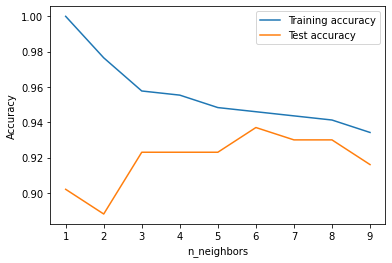

In [11]:
plt.plot(neighbors_settings,training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings,test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


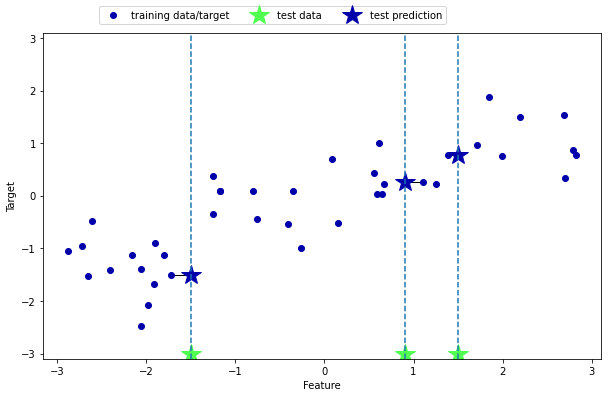

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

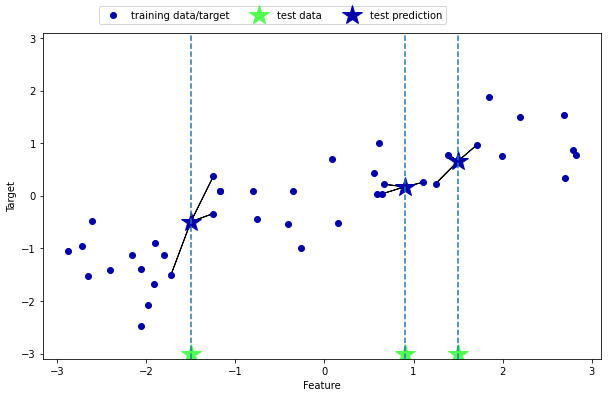

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

#waveデータセットを訓練セットとテストセットに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
#訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [17]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [19]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

Test set R^2:0.83


w[0]: 0.393906  b: -0.031804


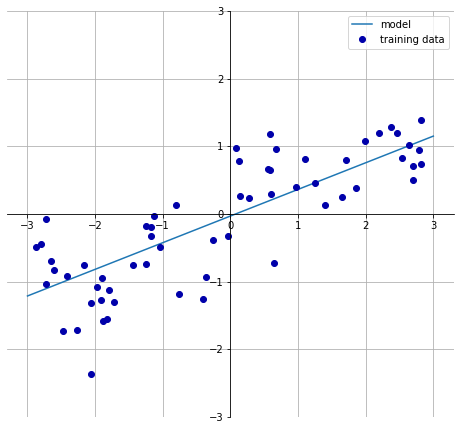

In [20]:
#linear model

mglearn.plots.plot_linear_regression_wave()

In [22]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples =60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42)

lr = LinearRegression().fit(X_train,y_train)

In [23]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept:-0.031804343026759746


In [24]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))


Training set score:0.67
Test set score:0.66


Training set score:0.67
Test set score:0.66

↑精度は高くないが、訓練セットとテストセットに対する値が非常に近い。
適合不足であって、過剰適合ではないことがわかる